In [9]:
import json
import pandas as pd
import json
import requests

In [10]:
# List to store stock data
stock_data_list = []


def fetch_stock_data(stock, apikey=''):
    #get stock data
    url = "https://yfapi.net/v6/finance/quote"
    headers = {'x-api-key': apikey}
    querystring = {"symbols": stock}

    response = requests.get(url, headers=headers, params=querystring)
    stock_json = response.json()

    #handle errors
    if 'quoteResponse' not in stock_json or not stock_json['quoteResponse']['result']:
        print(f"Error: Stock not found or unexpected API response.")
        return None

    stock_info = stock_json['quoteResponse']['result'][0]
    
    #extract and print the stock
    stock_data = {
        "Ticker": stock_info.get("symbol"),
        "Full Name": stock_info.get("longName"),
        "Current Price": stock_info.get("regularMarketPrice"),
        "52 Week High": stock_info.get("fiftyTwoWeekHigh"),
        "52 Week Low": stock_info.get("fiftyTwoWeekLow")
    }

    stock_data_list.append(stock_data)
    
    print(f"\nFetched Data for {stock}:")
    print(f"Ticker: {stock_info.get('symbol')}")
    print(f"Full Name: {stock_info.get('longName')}")
    print(f"Current Price: ${stock_info.get('regularMarketPrice')}")
    print(f"52 Week High: ${stock_info.get('fiftyTwoWeekHigh')}")
    print(f"52 Week Low: ${stock_info.get('fiftyTwoWeekLow')}")

    
    #get the trending stock from Yahoo Finance API
def get_trending_stocks(apikey=' ', num_stocks=5): #put in api key
    url = "https://yfapi.net/v1/finance/trending/US"
    headers = {'x-api-key': apikey}

    response = requests.get(url, headers=headers)
    trending_json = response.json()

    #handle errors
    if 'finance' in trending_json and 'result' in trending_json['finance'] and trending_json['finance']['result']:
        print("\nFetching trending stocks...\n")
        for stock_data in trending_json['finance']['result'][0]['quotes'][:num_stocks]:
            stock = stock_data['symbol']
            fetch_stock_data(stock, apikey) 
    else:
        print("Error: Unexpected API response format for trending stocks.")

#put data in a dataframe and then store that to a csv       
def save_to_csv():
    df = pd.DataFrame(stock_data_list)
    df.to_csv('stock_data.csv', index=False)
    print("\nData saved to stock_data.csv")

def main():
    apikey = ' ' #api key
    
    #user input for stock
    user_stock = input("Enter stock ticker symbol: ").upper()
    fetch_stock_data(user_stock, apikey) 

    #get trending stocks data
    get_trending_stocks(apikey)

    #save data to csv
    save_to_csv()

if __name__ == "__main__":
    main()


Enter stock ticker symbol: AAPL

Fetched Data for AAPL:
Ticker: AAPL
Full Name: Apple Inc.
Current Price: $227.725
52 Week High: $237.23
52 Week Low: $164.08

Fetching trending stocks...


Fetched Data for NQ=F:
Ticker: NQ=F
Full Name: None
Current Price: $20261.5
52 Week High: $20983.75
52 Week Low: $14140.25

Fetched Data for ES=F:
Ticker: ES=F
Full Name: None
Current Price: $5799.25
52 Week High: $5830.0
52 Week Low: $4122.25

Fetched Data for YM=F:
Ticker: YM=F
Full Name: None
Current Price: $42681.0
52 Week High: $43005.0
52 Week Low: $32409.0

Fetched Data for AMSC:
Ticker: AMSC
Full Name: American Superconductor Corporation
Current Price: $22.98
52 Week High: $32.7
52 Week Low: $5.78

Fetched Data for GC=F:
Ticker: GC=F
Full Name: None
Current Price: $2685.3
52 Week High: $2687.7
52 Week Low: $1809.4

Data saved to stock_data.csv


Enter a stock ticker symbol for historical prices: AAPL


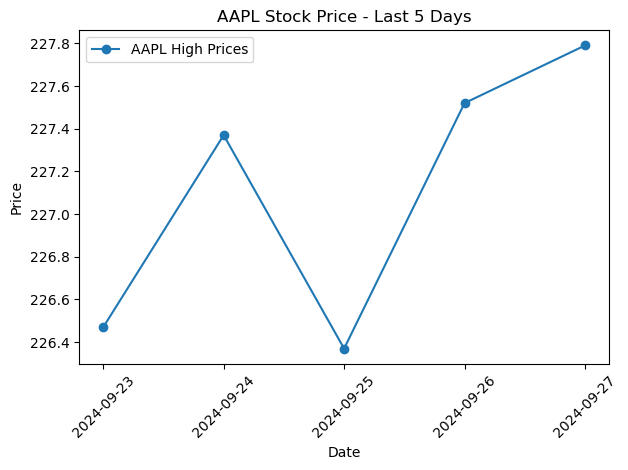

In [11]:
#bonus
import requests
import matplotlib.pyplot as plt
from datetime import datetime

def plot_stock_high(stock, apikey=''):
    #endpoint to fetch historical data
    history_url = f"https://yfapi.net/v8/finance/spark?symbols={stock}&range=5d&interval=1d"
    headers = {'x-api-key': apikey}
    
    try:
        #request the API to chart the historical price
        response = requests.get(history_url, headers=headers)
        data = response.json()
        
        #get the timestamps and historical prices
        stock_prices = data[stock]['close']
        dates = [datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d') for ts in data[stock]['timestamp']]
        
        #plot the prices
        plt.plot(dates, stock_prices, marker='o', label=f'{stock} High Prices')
        plt.title(f'{stock} Stock Price - Last 5 Days')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.xticks(rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.show()
    
    #handle errors
    except (KeyError, IndexError, requests.RequestException) as e:
        print(f"Error: Could not retrieve historical stock data for {stock}.")
        print(e)

if __name__ == "__main__":
    #user input for stock
    stock = input("Enter a stock ticker symbol for historical prices: ").upper()
    apikey = ' '  #api key
    
    #plot historical prices
    plot_stock_high(stock, apikey)
